In [1]:
## begin segmentation practice 
### found this on the segmentation documentation for skimage
import numpy as np
import matplotlib.pyplot as plt

import skimage.data as data
import skimage.segmentation as seg
from skimage import filters
from skimage import draw
from skimage import color
from skimage import exposure
from skimage.io import imread


def image_show(image, nrows=1, ncols=1, cmap='gray', **kwargs):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6,6))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    # plt.show()
    return fig, ax

(<Figure size 600x600 with 1 Axes>, <Axes: >)

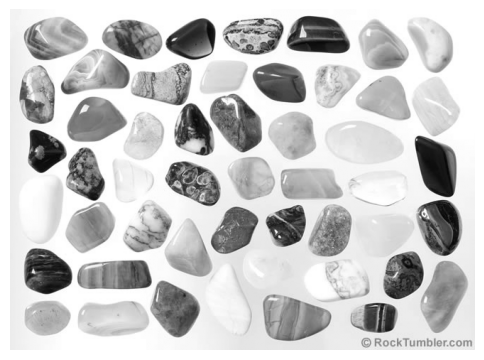

In [59]:
stones = imread('stones.jpg', as_gray = True)

image_show(stones)

/opt/anaconda3/lib/python3.12/site-packages/skimage/segmentation/random_walker_segmentation.py:545: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  (labels, nlabels, mask, inds_isolated_seeds, isolated_values) = _preprocess(labels)


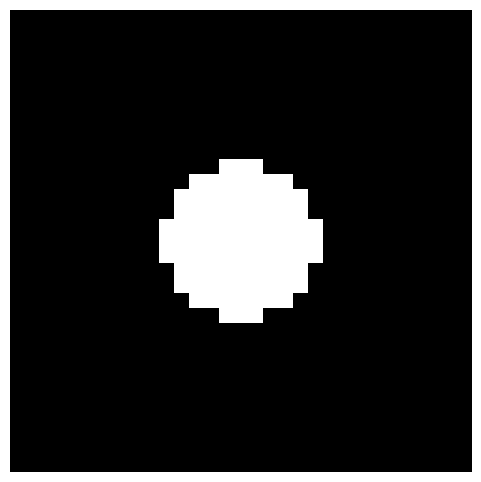

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [50]:
# let's try this method on a simple user-made image?
N = 30
x,y = np.arange(-(N//2), (N//2)+1), np.arange(-(N//2), (N//2)+1)
# let's do a simple circle in the middle 

xv, yv = np.meshgrid(x,y) 

r = np.sqrt(xv**2 + yv**2)
rad = 27
circ = (xv**2 + yv**2 <= rad).astype(int) + 1# set to 1,0 instead of True, False 


# image_show(circ)


# seg.random_walker?

image_show(seg.random_walker(data = circ, labels = circ, beta = 130))

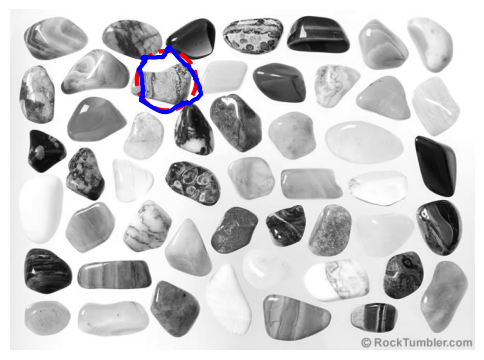

In [64]:
def circle_points(resolution, center, radius):
    """Generate points defining a circle on an image."""
    radians = np.linspace(0, 2*np.pi, resolution)

    c = center[1] + radius*np.cos(radians)
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T

# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [100, 220], 42)[:-1]

snake = seg.active_contour(stones, points)

fig, ax = image_show(stones)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

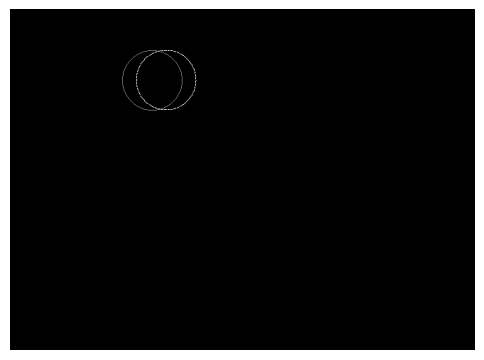

In [73]:
# we can then use this as teh marker labels for the random_walker

stones_labels = np.zeros(stones.shape, dtype = np.uint8) 

indices = draw.circle_perimeter(100,200, 42)

stones_labels[indices] = 1

stones_labels[points[:, 1].astype(int), points[:, 0].astype(int)] = 2

image_show(stones_labels)


stones_segmented = seg.random_walker(stones, stones_labels)

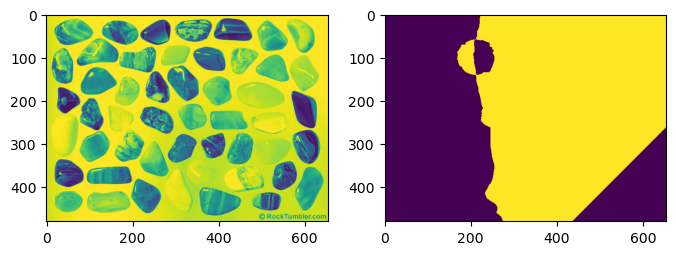

In [74]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (8,3))

ax1.imshow(stones)
ax2.imshow(stones_segmented)

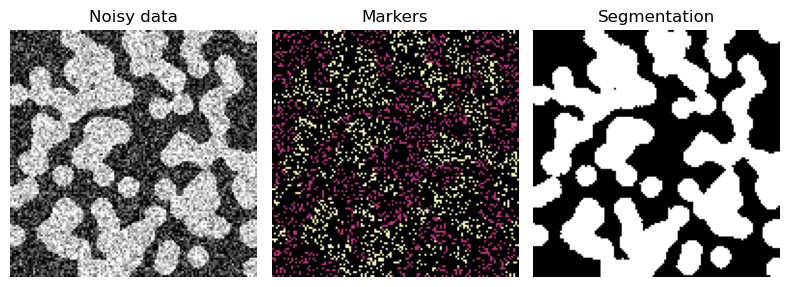

In [1]:
# try a pre-defined random walker

import numpy as np
import matplotlib.pyplot as plt

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import skimage

rng = np.random.default_rng()

# Generate noisy synthetic data
data = skimage.img_as_float(binary_blobs(length=128, rng=1))
sigma = 0.35
data += rng.normal(loc=0, scale=sigma, size=data.shape)
data = rescale_intensity(data, in_range=(-sigma, 1 + sigma), out_range=(-1, 1))

# The range of the binary image spans over (-1, 1).
# We choose the hottest and the coldest pixels as markers.
markers = np.zeros(data.shape, dtype=np.uint)
markers[data < -0.95] = 1
markers[data > 0.95] = 2

# Run random walker algorithm
labels = random_walker(data, markers, beta=10, mode='bf')

# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 3.2), sharex=True, sharey=True)
ax1.imshow(data, cmap='gray')
ax1.axis('off')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='magma')
ax2.axis('off')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray')
ax3.axis('off')
ax3.set_title('Segmentation')

fig.tight_layout()
plt.show()